Nome: Francisco Jerônimo  da Silva Júnior <br>
Matrícula: 433399

### Importação

In [16]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, tree , metrics
from sklearn.model_selection import train_test_split
import random

In [17]:
random.seed(2021)

### Carregue o dataset

Iremos usar o conjunto de dados "Optical Recognition of Handwritten Digits", nele foram usados programas de pré-processamento disponibilizados pelo NIST para extrair bitmaps normalizados de dígitos manuscritos de um formulário pré-impresso. De um total de 43 pessoas, 30 contribuíram para o conjunto de treinamento e 13 diferentes para o conjunto de teste. Os bitmaps de 32x32 são divididos em blocos não sobrepostos de 4x4 e o número de pixels é contado em cada bloco. Isso gera uma matriz de entrada de 8x8, onde cada elemento é um número inteiro no intervalo de 0 a 16. Isso reduz a dimensionalidade e dá invariância a pequenas distorções.

In [18]:
digits = datasets.load_digits()

### Imprima a variável digits. O que tem no seu conteúdo?

In [19]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

### Para visualizar os dígitos execute a célula abaixo

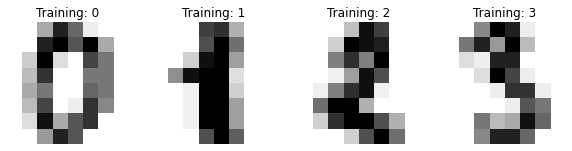

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### Para usar a imagem, precisamos formatar cada matriz de pixels como um array de uma única  linha, a célula abaixo executa este processo

In [21]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [22]:
data.shape

(1797, 64)

### Imprima o número de linhas e de colunas do conjunto de dados

In [23]:
print("Linhas: %i\nColunas: %i" % data.shape)

Linhas: 1797
Colunas: 64


### A célula abaixo cria um objeto do tipo DecisionTreeClassifier. Como padrão a métrica para escolha do atributo de particionamento é o gini index, o número mínimo de amostras em uma folha é 1, o número mínimo de amostras em um nó para que possa ser feito o split é 2 e não há valor máximo para a profundidade da árvore. Altere a célula abaixo para a árvore de decisão utilizar o critério entropia, o número mínimo de amostras na folha igual a 3, o número mínimo de amostra para split igual a 5 e a profundidade máxima igual 5. 

 

In [24]:
# Create a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3, min_samples_split=5, max_depth=5)

### Para realizar o treinamento, vamos dividir o dataset em treino e teste. Modifique a célula abaixo para que os dados de treino representem 70% do total dos dados  e para que a amostragem seja estratificada de acordo com o valor do atributo de classe. Para isso, consulte a documentação da função no scikit-learn

In [25]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, stratify=digits.target)

### O método fit recebe os dados de treino e treina o modelo. Altere a célula abaixo passando a matriz de atributos de treino e o vetor de classes, nesta ordem

In [26]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

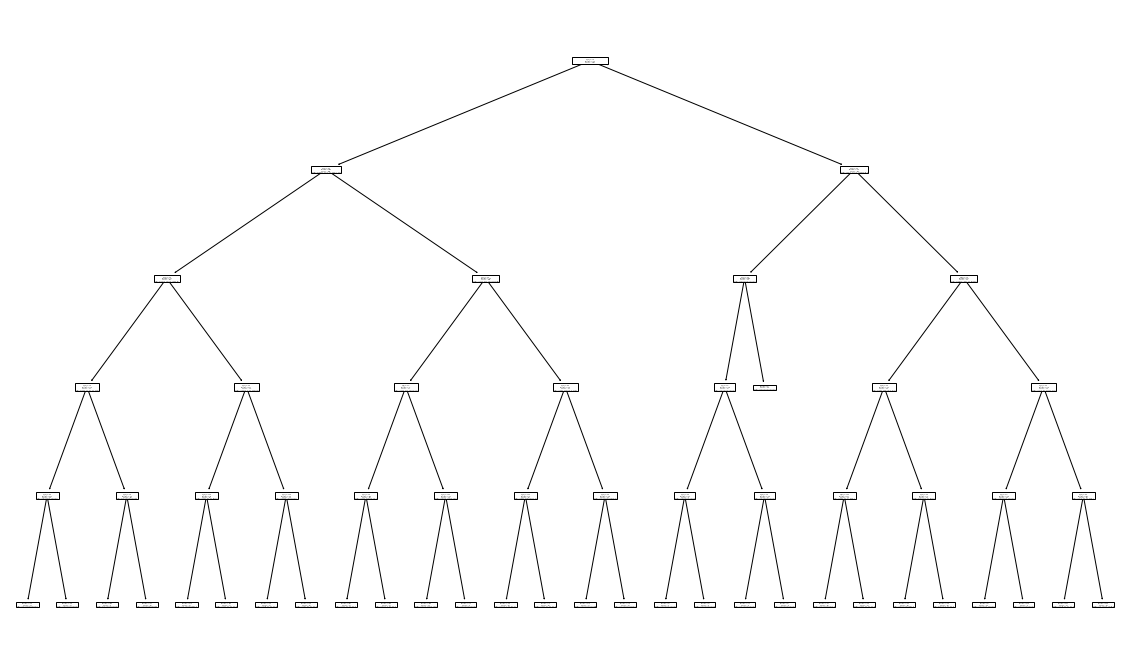

In [27]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf)
plt.show()

### O método predict recebe a matriz de atributos de teste e prevê a classe. Altere a célula abaixo passando como parâmetro a matriz de teste

In [28]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

### O método classification_report calcula as métricas de avaliação para cada classe e as médias de cada métrica. Altere a célula passando como parâmetro o vetor de classe real e o vaetor de classe predito para o conjunto de teste.

In [29]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test , predicted)}\n")

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        54
           1       0.65      0.89      0.75        55
           2       0.89      0.79      0.84        53
           3       0.80      0.71      0.75        55
           4       0.72      0.80      0.75        54
           5       0.93      0.67      0.78        55
           6       1.00      0.96      0.98        54
           7       0.85      0.76      0.80        54
           8       0.62      0.79      0.69     

### Qual o dígito que o classificador conseguiu prever com maior acuárica? E o de menor acurácia?

**Maior acurácia** <br>
Digito 6, precisão de 1.00 <br>
**Menor acurácia** <br>
Digito 8, precisão de 0.62

### O método a seguir imprime a matriz de confusão. As linhas indicam o valor real e as colunas o valor predito. O valor em uma célula mij, indica a quantidade de valores da classe i preditos como se fossem da classe j. 

Confusion matrix:
[[53  0  0  0  1  0  0  0  0  0]
 [ 0 49  2  0  0  0  0  0  3  1]
 [ 1  5 42  1  0  0  0  2  2  0]
 [ 0  6  2 39  3  0  0  1  4  0]
 [ 0  2  0  0 43  1  0  3  5  0]
 [ 0  5  0  4  1 37  0  0  3  5]
 [ 0  1  0  0  0  1 52  0  0  0]
 [ 0  1  0  0  3  1  0 41  7  1]
 [ 3  3  1  0  2  0  0  1 41  1]
 [ 1  3  0  5  7  0  0  0  1 37]]


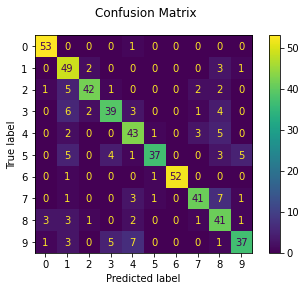

In [31]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

###  Observe a matriz de confusão. Qual a célula com o maior número de classificações incorretas? Existe alguma similaridade no desenho dos dígitos correspondentes a essa célula?

Célula m[7,8]